In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

# check scikit-learn version
import sklearn
print('Sklearn_version:',sklearn.__version__)

Sklearn_version: 0.19.1


In [2]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [3]:
#Loading the dataset
df=pd.read_csv('Bias_correction_ucl.csv',parse_dates=['Date'])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4


11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645


20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [4]:
#Checking the shape of the dataset
df.shape

(7752, 25)

Observation:
    
    The dataset consist of 7752 rows and 25 columns.

In [5]:
#Show all the columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
#Checking the datatype of columns
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Observation:
    
    All the datatypes are in float64 except Date column.Date column is in datetime format

In [7]:
#Seeing the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null datetime64[ns]
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slop

Observation:
    
    1-The datatype consist of only numerical columns except Date column. Date column is in datetime format.
    
    2-In this datset there are two target features i.e. Next_Tmax and Next_Tmin.
    
    3-There are null values in our dataset.

## To check the missing values

In [8]:
#Checking the missing values in data set
df.isnull().values.any()

True

In [9]:
#Checking the number of missing values in the columns
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

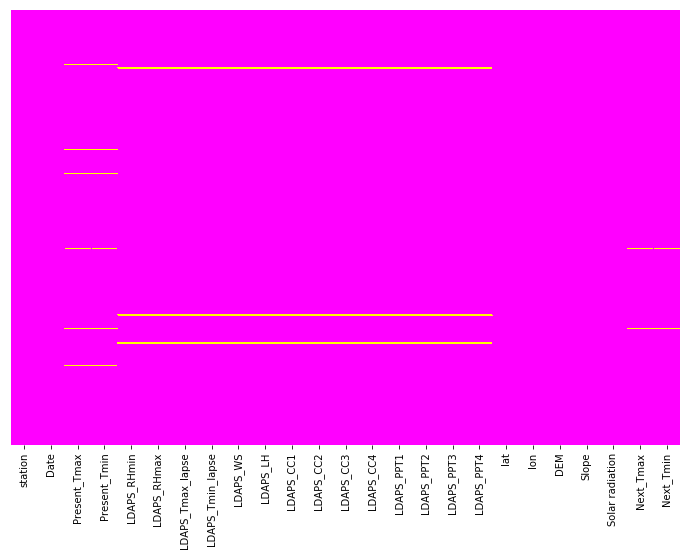

In [10]:
#Seeing the null values via visualization
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='spring')
plt.show()

Observation:
    
    There are missing values present in all the columns except lat, lon, DEM, Slope, Solar radiation columns  

In [11]:
#Filling the null values in Date column with mode.
df['Date'].fillna(df['Date'].mode()[0], inplace=True)

In [12]:
#Imputing the missing value of Numeric columns with their mean

df['station'].fillna(df['station'].mean(), inplace=True)
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(), inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(), inplace=True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(), inplace=True)
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(), inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(), inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(), inplace=True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(), inplace=True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(), inplace=True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(), inplace=True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(), inplace=True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(), inplace=True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(), inplace=True)

In [13]:
#Imputing the missing values of Numeric columns with their mean.
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(), inplace=True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(), inplace=True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(), inplace=True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(), inplace=True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(), inplace=True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(), inplace=True)

In [14]:
#Now again checking for missing values.
df.isnull().values.any()

False

In [15]:
#Now checking the null value in columns
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

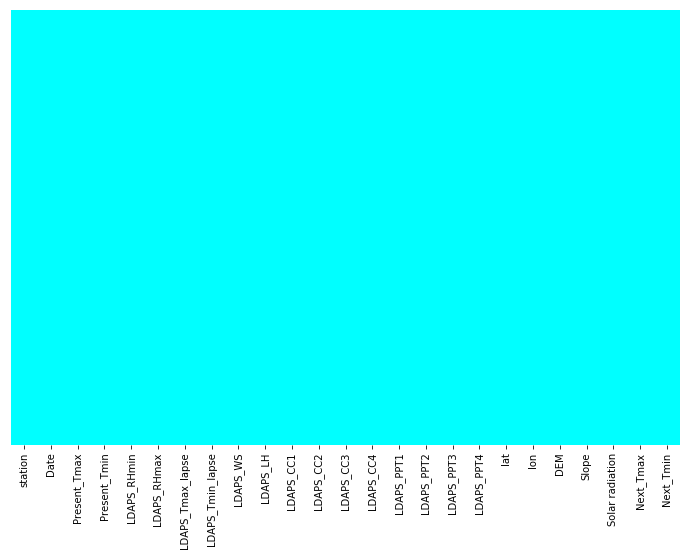

In [16]:
#Seeing the null values with the help of heat map
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')

Observation:
    
    Now all the null values are fillup.

# Summary Statistic

In [17]:
#Summary Statistics
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Observation:
    
    1-Number of weather stations is 25.
    
    2-For Present_Tmax maximum temperature is 37.60°C and minimum temperature is 20°C.
    
    3-For Present_Tmin max temp is 29.90°C and min temp is 11.30°C.
    
    4-For minimum relative humidity column RH_min is 19.79% and RH_max is 98.52%
    
    5-For maximum relative humidity column RH_min is 58.93% and RH_max is 100%.
    
    6-LDAPS model forecast of next-day maximum air temperature applied lapse rate in °C: 17.6 to 38.5
    
    7-LDAPS model forecast of next-day minimum air temperature applied lapse rate in °C: 14.27 to 29.61.
        
    8-LDAPS model forecast of next-day average wind speed (m/s) is: 2.9 to 21.9
    
    9-LDAPS model forecast of next-day average latent heat flux (W/m2) is: -13.6 to 213.4.
        
    10-The data is right skewed in LDAPS_RHmin, LDAPS_WS, LDAPS_LH because mean is greater than median.
    
    11-The difference between 75% and maximum is higher in LDAPS_RHmin, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2,
       LDAPS_PPT3, LDAPS_PPT4 columns thats why outliers may be present.

## Exploring the Columns

In [18]:
#Printing the columns and their unique values

for column in df.columns:
    if df[column].dtypes == np.number:
        print(str(column)+ ' : ' +str(df[column].nunique()))
        print('*****************************')

station : 25
*****************************
Present_Tmax : 168
*****************************
Present_Tmin : 156
*****************************
LDAPS_RHmin : 7673
*****************************
LDAPS_RHmax : 7665
*****************************
LDAPS_Tmax_lapse : 7676
*****************************
LDAPS_Tmin_lapse : 7676
*****************************
LDAPS_WS : 7676
*****************************
LDAPS_LH : 7676
*****************************
LDAPS_CC1 : 7570
*****************************
LDAPS_CC2 : 7583
*****************************
LDAPS_CC3 : 7600
*****************************
LDAPS_CC4 : 7525
*****************************
LDAPS_PPT1 : 2813
*****************************
LDAPS_PPT2 : 2511
*****************************
LDAPS_PPT3 : 2357
*****************************
LDAPS_PPT4 : 1919
*****************************
lat : 12
*****************************
lon : 25
*****************************
DEM : 25
*****************************
Slope : 27
*****************************
Solar radiation : 1575


# To Check the correlation

In [19]:
df_cor=df.corr()
df_cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,0.006126,-0.002709,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Present_Tmax,0.112655,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,-0.144018,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,-0.002772,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

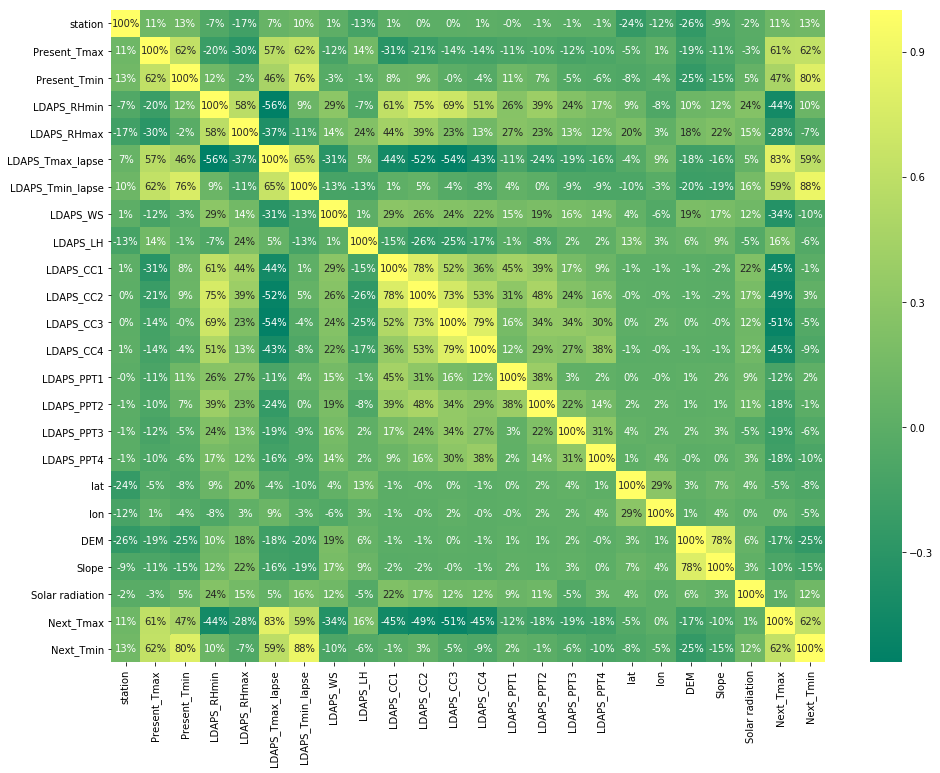

In [20]:
#Checking the correlation via heatmap.
plt.figure(figsize=(16,12))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='summer')
plt.show()

Observation:
    
    1-Present_Tmax and Present_Tmin is highly correlated with Next_Tmax, Next_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse
      and viceversa.
    
    2-LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2 columns is highly correlated with each other.

# Visualization

Text(0.5,1,'Correlation with first target columns i.e. Next_Tmax')

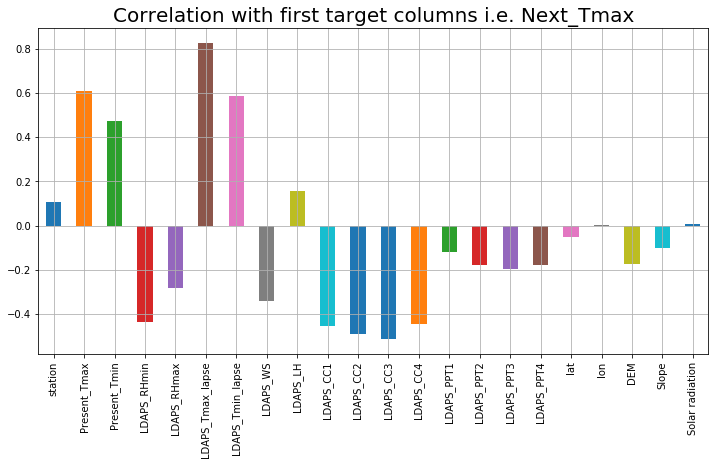

In [21]:
#Correlation with first target column
plt.figure(figsize=(12,6))
df.drop(columns=['Next_Tmax','Next_Tmin'], axis=1).corrwith(df['Next_Tmax']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with first target columns i.e. Next_Tmax",fontsize=20)

Observation:
    
    1-In this fig we clearly see that Present max and min Temperature column is highly correlated with our first target
      feature.
        
    2-LDAPS_Tmax_lapse and LDAPS_Tmin_lapse column is also highly correlated with our first target variable.
    
    3-LDAPS model forecast of next-day split average cloud cover columns is moderately negative correlated with our
      target column along with LDAPS RHmin, LDAPS RHmax and LDAPS_WS columns.

Text(0.5,1,'Correlation with Second target columns i.e. Next_Tmin')

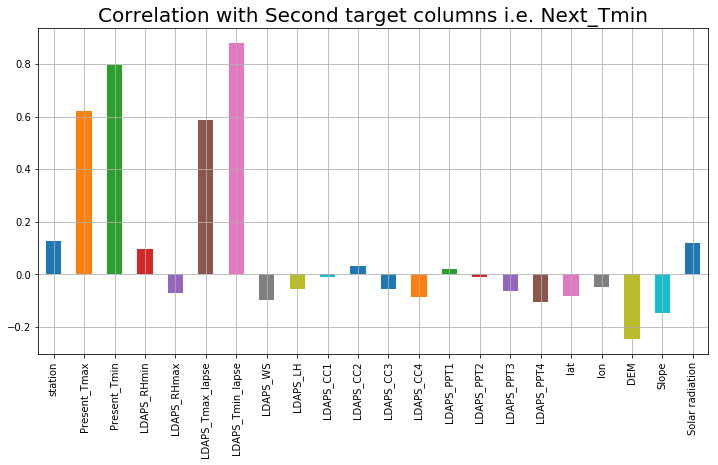

In [22]:
#Correlation with second target column
plt.figure(figsize=(12,6))
df.drop(columns=['Next_Tmax','Next_Tmin'], axis=1).corrwith(df['Next_Tmin']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Second target columns i.e. Next_Tmin",fontsize=20)

Observation:
    
    1-In this fig we clearly see that Present max and min Temperature column is highly correlated with our second target
      feature.
        
    2-LDAPS_Tmax_lapse and LDAPS_Tmin_lapse column is also highly correlated with our second target variable.

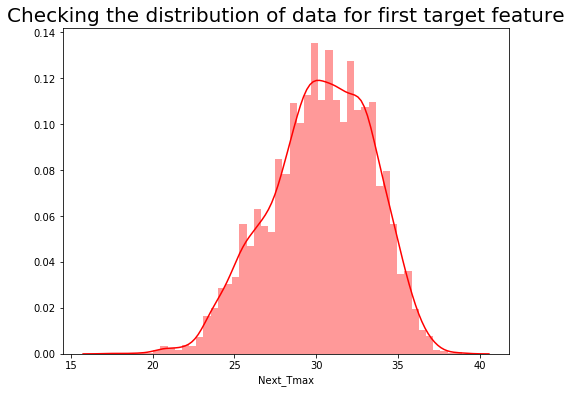

Skewness: -0.34019991888425033


In [23]:
#Checking the data distribution of our first Target column and its skewness.
plt.figure(figsize=(8,6))
sns.distplot(df['Next_Tmax'],color='red')
plt.title('Checking the distribution of data for first target feature',fontsize=20)
plt.show()

print('Skewness:',df['Next_Tmax'].skew())

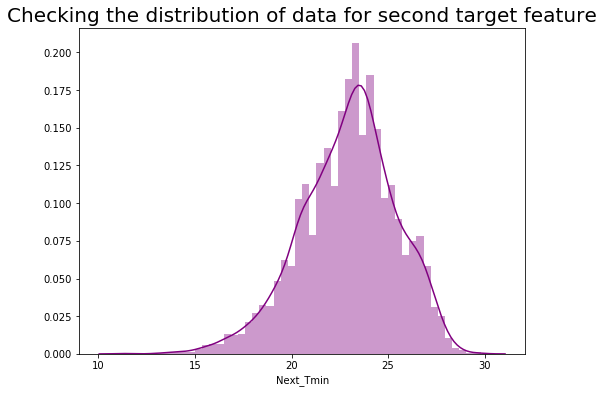

Skewness: -0.4044474841492746


In [24]:
##Checking the data distribution of our second Target column and its skewness.
plt.figure(figsize=(8,6))
sns.distplot(df['Next_Tmin'],color='purple')
plt.title('Checking the distribution of data for second target feature',fontsize=20)
plt.show()

print('Skewness:',df['Next_Tmin'].skew())

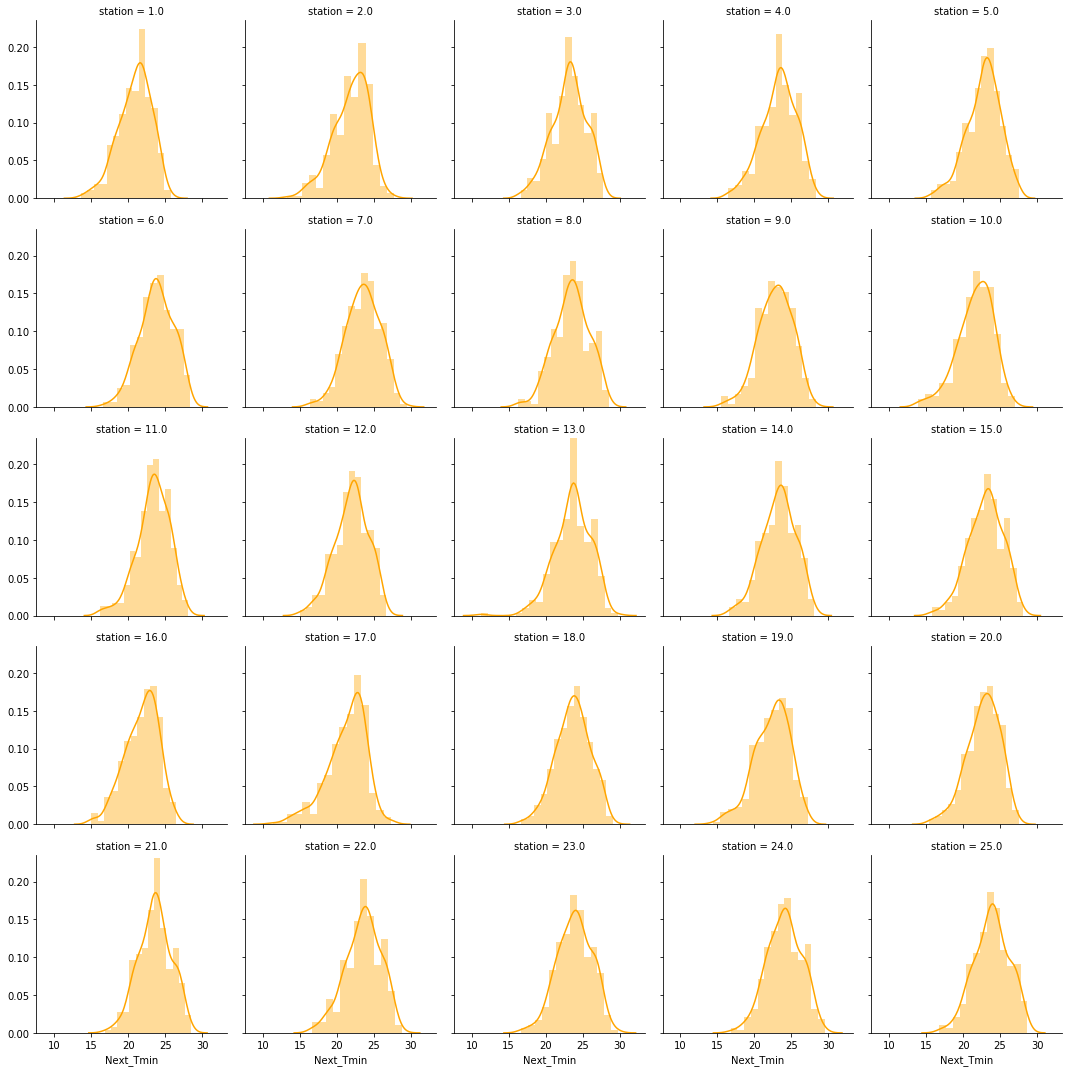

In [25]:
# Exploring Station vs first target column i.e. Next_Tmax via FaceGrid
facet = sns.FacetGrid(df, col='station',col_wrap=5)
facet.map(sns.distplot, "Next_Tmin",color='orange')
plt.show()

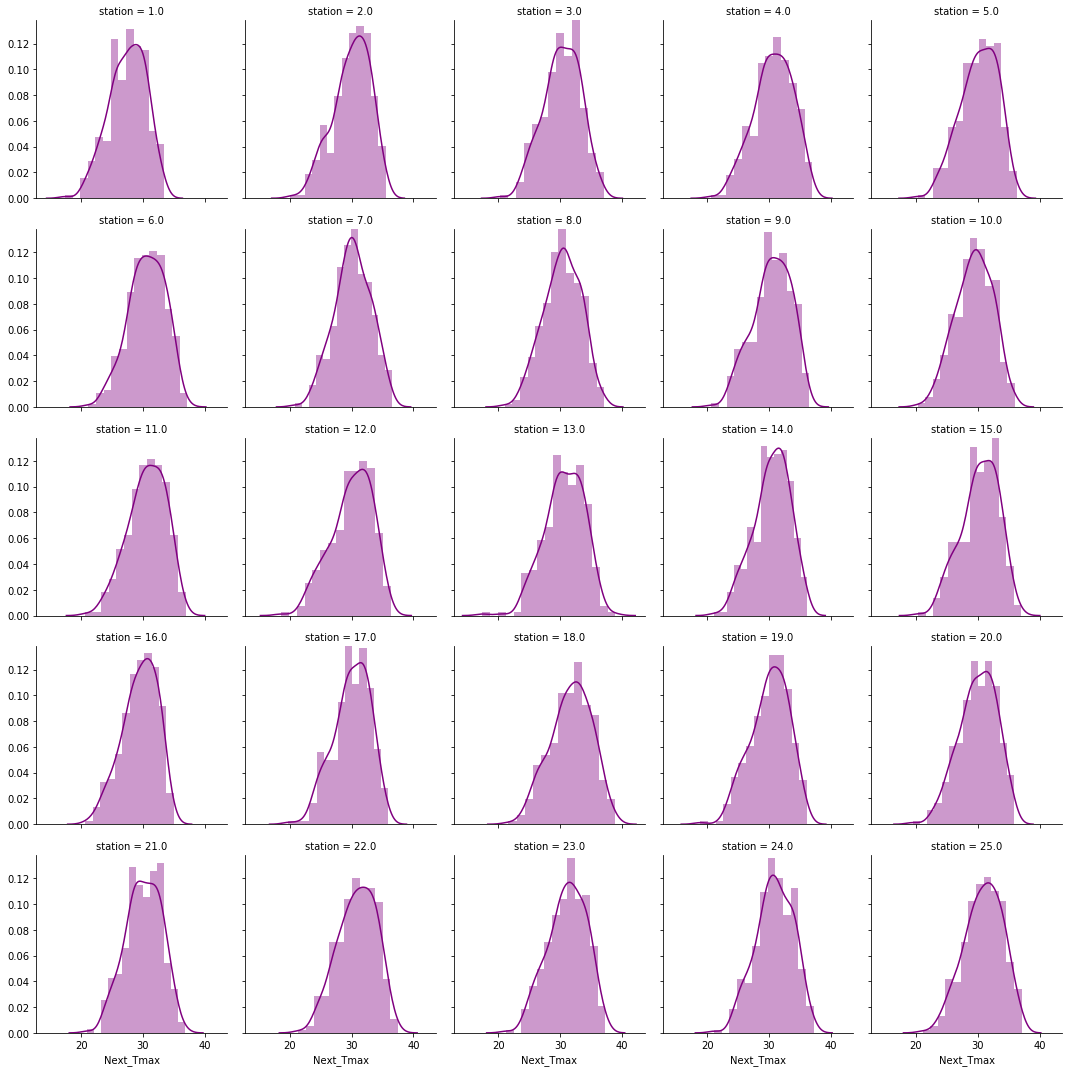

In [26]:
# Exploring Station vs second target column i.e. Next_Tmax via FaceGrid
facet = sns.FacetGrid(df, col='station',col_wrap=5)
facet.map(sns.distplot, "Next_Tmax",color='purple')
plt.show()

Observation:
    
    Here we see the distribution of Next TMax and Next Tmin according to station.

<Figure size 1008x432 with 0 Axes>

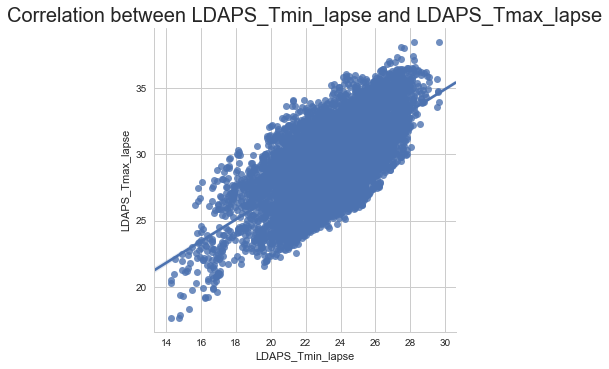

In [27]:
#Correlation between LDAPS_Tmin_lapse and LDAPS_Tmax_lapse
sns.set(style='whitegrid')
plt.figure(figsize=(14,6))
sns.lmplot(x='LDAPS_Tmin_lapse',y='LDAPS_Tmax_lapse',data=df,palette='magma')
plt.title('Correlation between LDAPS_Tmin_lapse and LDAPS_Tmax_lapse',fontsize=20)
plt.show()

<Figure size 1008x432 with 0 Axes>

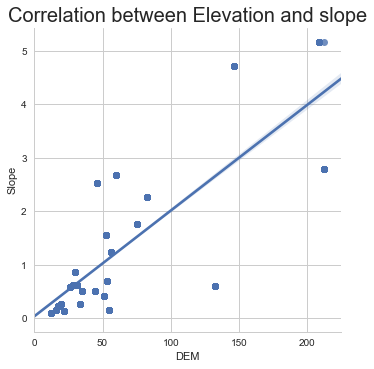

In [28]:
#Correlation between Elevation and slope
sns.set(style='whitegrid')
plt.figure(figsize=(14,6))
sns.lmplot(x='DEM',y='Slope',data=df,palette='magma')
plt.title('Correlation between Elevation and slope',fontsize=20)
plt.show()

<Figure size 1008x432 with 0 Axes>

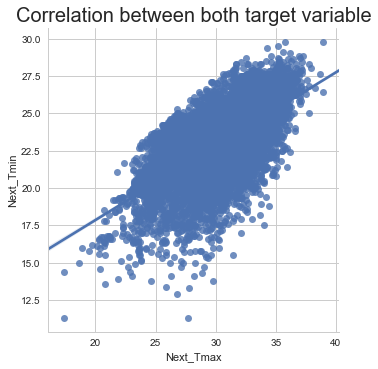

In [29]:
#Correlation between Elevation and slope
sns.set(style='whitegrid')
plt.figure(figsize=(14,6))
sns.lmplot(x='Next_Tmax',y='Next_Tmin',data=df,palette='magma')
plt.title('Correlation between both target variable',fontsize=20)
plt.show()

# To Check the skewness

In [30]:
#Checking the skewness
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [31]:
#Removing skewness via log method
df['Slope']=np.log(df['Slope'])
df['DEM']=np.log(df['DEM'])
df['LDAPS_WS']=np.log(df['LDAPS_WS'])

In [32]:
#Checking the skewness again
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 0.409854
Slope               0.062637
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

# Plotting Outliers

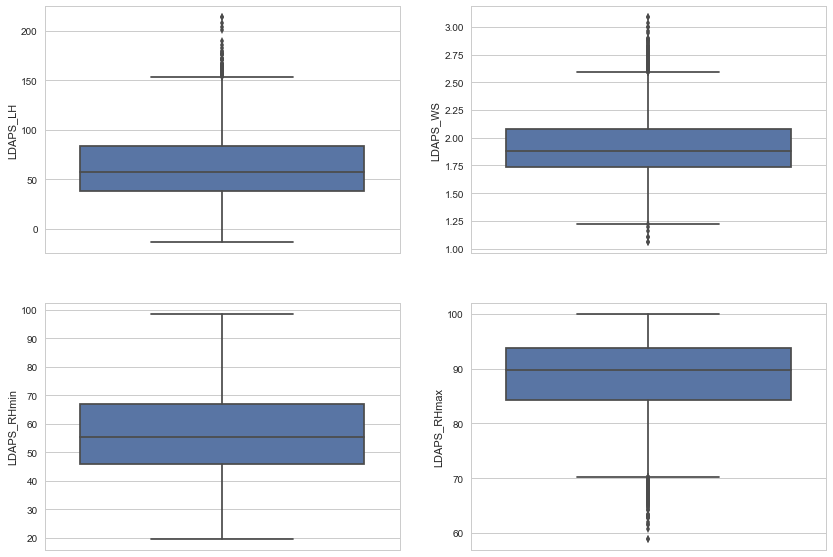

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'LDAPS_LH', data = df)
sns.boxplot(ax=ax2, y = 'LDAPS_WS', data = df)
sns.boxplot(ax=ax3, y = 'LDAPS_RHmin',  data = df)
sns.boxplot(ax=ax4, y = 'LDAPS_RHmax',  data = df)

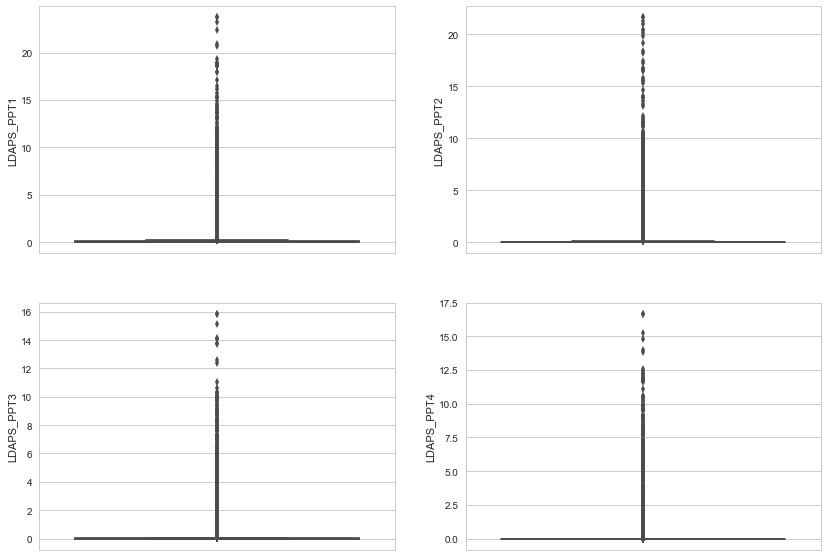

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'LDAPS_PPT1', data = df)
sns.boxplot(ax=ax2, y = 'LDAPS_PPT2', data = df)
sns.boxplot(ax=ax3, y = 'LDAPS_PPT3',  data = df)
sns.boxplot(ax=ax4, y = 'LDAPS_PPT4',  data = df)

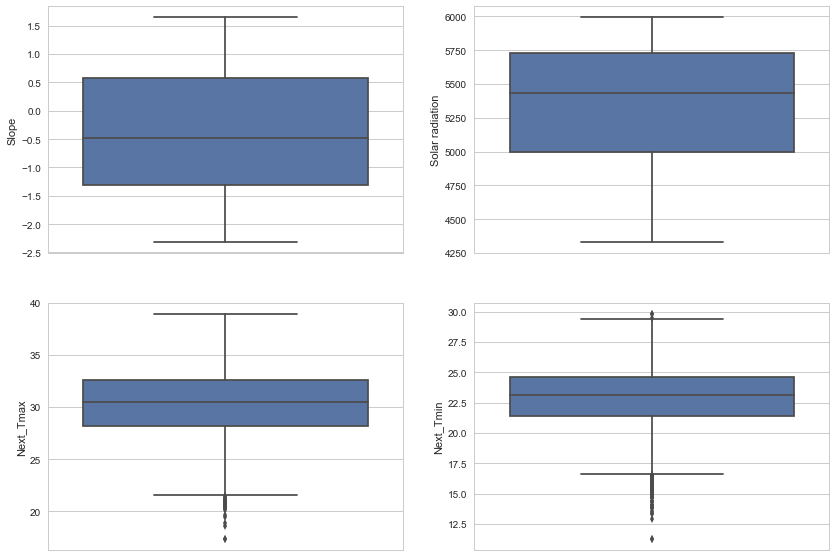

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'Slope', data = df)
sns.boxplot(ax=ax2, y = 'Solar radiation', data = df)
sns.boxplot(ax=ax3, y = 'Next_Tmax',  data = df)
sns.boxplot(ax=ax4, y = 'Next_Tmin',  data = df)

Observation:
    
    There are outliers present in our dataset which needs to be removed.

# Removing Outliers

In [36]:
#Creating the copy of our data set and droping the date column
df1=df.copy()

df.drop(columns=['Date'],axis=1,inplace=True)

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.6643153 , 0.36132577, 0.75952931, ..., 1.51793488, 0.37628214,
        0.6975993 ],
       [1.52562236, 0.72108401, 0.6762959 , ..., 1.22994952, 0.07209725,
        0.17406357],
       [1.38692941, 0.61960809, 0.03118815, ..., 1.21653443, 0.26425985,
        0.38974413],
       ...,
       [1.6643153 , 2.22171758, 2.42419767, ..., 2.0743251 , 0.79263444,
        2.2279345 ],
       [0.        , 3.30412736, 4.9628169 , ..., 2.35821196, 4.12345278,
        4.68452522],
       [0.        , 2.64912642, 2.77789093, ..., 1.51793488, 2.76237361,
        2.76579089]])

In [38]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [39]:
df_new=df[(z<3).all(axis=1)]

In [40]:
#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(7752, 24) 		 (6931, 24)


In [41]:
df=df_new
df.shape

(6931, 24)

# Model Training

In [42]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,5.358165,1.024248,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,3.801369,-0.665337,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.814535,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,3.505762,-1.323883,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.731664,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,3.822448,0.930115,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.746589,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,3.556433,-0.682207,5859.552246,31.2,22.5


In [43]:
#Splitting the data into input and output variable.
x=df.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
x.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,5.358165,1.024248,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,3.801369,-0.665337,5869.312500


In [44]:
y=pd.concat([df['Next_Tmax'], df['Next_Tmin']],axis=1)
y.head(2)

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5


In [45]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(6931, 22) 		 (6931, 2)


In [46]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [47]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [48]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(5544, 22) 		 (1387, 22)


In [49]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(5544, 2) 	 (1387, 2)


In [50]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [51]:
# All Algorithm by using for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),ExtraTreesRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.7736455291843932
MAE: 0.9896943664175106
MSE: 1.6973787544447494
RMSE: 1.3028348914750285
R2_score: 0.7694339284185994
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 1.0
MAE: 1.0203082670101238
MSE: 1.9801698385759465
RMSE: 1.4071850761630278
R2_score: 0.7255366114894795
*****************************************************************************************


Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform') is:

In [52]:
# Cross Validate All Algorithm by using for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),ExtraTreesRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [0.60575538 0.48324264 0.77597348 0.63938643 0.58105538 0.60620295
 0.71716454 0.54684593 0.68201821 0.77111194 0.43262805 0.7077619
 0.71458568 0.57846222 0.68023429]
Mean Score: 0.6348286015246146
Standard deviation: 0.09681657065642887
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Score: [-0.03980357  0.13367786  0.41098448  0.16800662  0.33461542 -0.06673649
  0.35543425  0.07100681  0.39782571  0.40490376 -0.07969625  0.6185468
  0.48491552  0.04079179  0.34813639]
Mean Score: 0.23884060656094613
Standard deviation: 0.2125845

### Using linear SVR with the MultiOutputRegressor wrapper for multioutput regression

In [53]:
#Linear SVR with the MultiOutputRegressor wrapper for multioutput regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define model
model = LinearSVR()
wrapper = MultiOutputRegressor(model)
# fit model
wrapper.fit(x_train,y_train)
wrapper.score(x_train,y_train)
pred_y=wrapper.predict(x_test)
print('Score of',m,'is:',score)
print('MAE:',mean_absolute_error(y_test,pred_y))
print('MSE:',mean_squared_error(y_test,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_y)))
print('R2_score:',r2_score(y_test,pred_y))

Score of ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False) is: [0.42255605 0.53881725 0.72947595 0.60699766 0.60348641 0.49094625
 0.69179267 0.43595329 0.67661385 0.66897102 0.41029134 0.76049252
 0.74441038 0.53937778 0.63485962]
MAE: 0.9839932500926662
MSE: 1.7187238924283377
RMSE: 1.311001103137727
R2_score: 0.7661739334943503


### I choose ExtraTreesRegressor as my best model.

In [54]:
#Using Random Forest Regressor with its best parameters

etr=ExtraTreesRegressor(n_estimators=10,random_state=42)
etr.fit(x_train,y_train)
print('Score:',etr.score(x_train,y_train))
predetr=etr.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predetr))
print('Mean squared error:',mean_squared_error(y_test,predetr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predetr)))
print('\n')
print("r2_score:",r2_score(y_test,predetr))
print('\n') 

#Cross validate the model
score=cross_val_score(etr,x,y,cv=15,scoring='r2')
print("Score of cross_validation:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: 1.0


Mean absolute error: 0.6718312900885003
Mean squared error: 0.7910185355687329
Root Mean Squared Error: 0.8893922281922262


r2_score: 0.8901988271975764


Score of cross_validation: [0.44809875 0.48500527 0.73424647 0.59361683 0.54594433 0.50500532
 0.68644678 0.47203767 0.67110072 0.69614511 0.38125996 0.74502285
 0.70716598 0.53660661 0.58818213]
Mean Score: 0.5863923183777701
Standard deviation: 0.11141438195734946


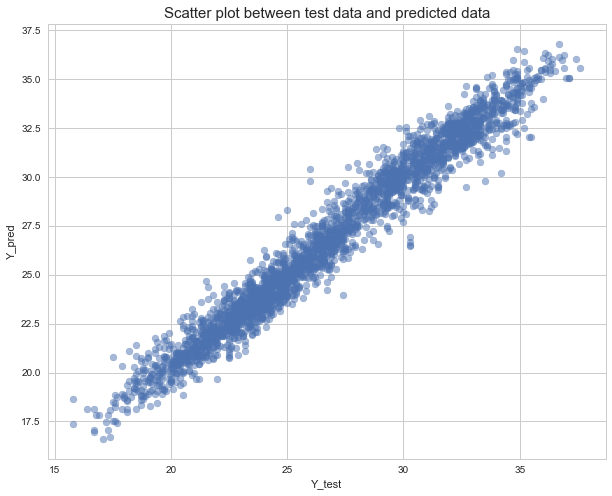

In [55]:
#Scatter plot between test data and prediction
plt.figure(figsize=(10,8))
plt.scatter(y_test, predetr, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [56]:
#Saving the model
#Importing joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(etr,'numerical_prediction_model_temp_forecast_etr.pkl')

['numerical_prediction_model_temp_forecast_etr.pkl']

### Load the model and predict the temperature

In [57]:
#Load the model from the file
etr_from_joblib=joblib.load('numerical_prediction_model_temp_forecast_etr.pkl')

#Use the loaded model to make prediction
prediction=etr_from_joblib.predict(x)
prediction

array([[29.1, 21.2],
       [30.5, 22.5],
       [31.1, 23.9],
       ...,
       [28.3, 18.1],
       [28.6, 18.8],
       [27.8, 17.4]])

Findings:
    
    Here our model predict two outputs.

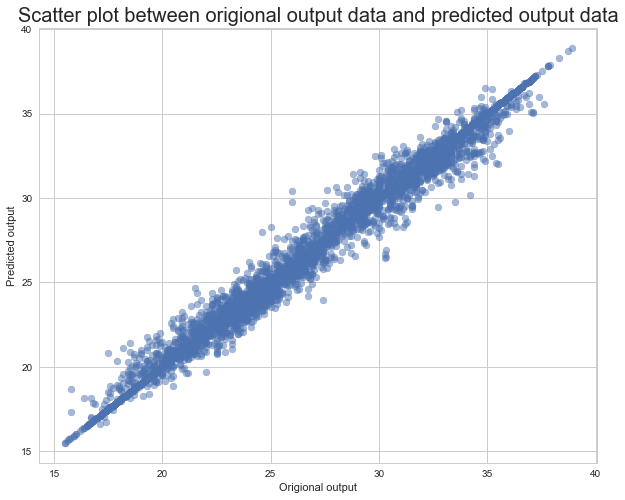

In [58]:
#Scatter plot between origional output data and predicted output data
plt.figure(figsize=(10,8))
plt.scatter(y,prediction, alpha = 0.5 )
plt.xlabel("Origional output")
plt.ylabel("Predicted output")
plt.title("Scatter plot between origional output data and predicted output data",fontsize=20)
plt.show()

Findings:
    
    Here we see that nearly all the data are follow the fit regression line means our model learn well.